# Dashboard of San Fransisco Crime Dataset with Mercury

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins


In [2]:
df = pd.read_csv("./SF_crime.csv")

In [7]:
# those variables will be updated by Mercury framework
# please keep all variables to be updated in one cell
limit = 1000
district = ['BAYVIEW', 'NORTHERN']
category = ['VANDALISM', 'ASSAULT', 'ROBBERY']

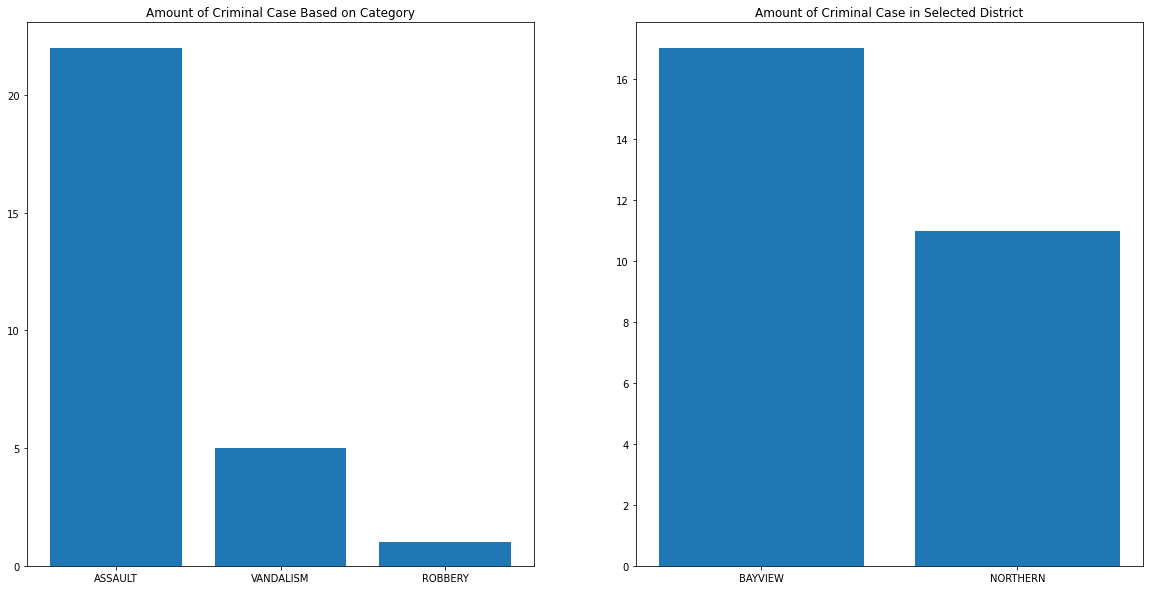

In [10]:
# the code for plotting is based on https://github.com/marcellusruben/sf-crime-voila/blob/main/sf_crime.ipynb
df = df.iloc[0:limit, :]

latitude = 37.77
longitude = -122.42

df_dist = df.loc[df['PdDistrict'].isin(np.array(district))]
df_category = df_dist.loc[df_dist['Category'].isin(np.array(category))]

cat_unique = df_category['Category'].value_counts()
cat_unique = cat_unique.reset_index()

dist_unique = df_category['PdDistrict'].value_counts()
dist_unique = dist_unique.reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)


incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_category.Y, df_category.X, df_category.Category):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)
# show map
display(sanfran_map)

ax1.bar(cat_unique['index'], cat_unique['Category'])
ax1.set_title('Amount of Criminal Case Based on Category')
ax2.bar(dist_unique['index'], dist_unique['PdDistrict'])
ax2.set_title('Amount of Criminal Case in Selected District')

plt.show()